In [103]:
# This tutorial demonstrates regression using a small 2-layer Neural Network

In [104]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [105]:
# initialize data
np.random.seed(1)
torch.manual_seed(1)
x = np.expand_dims(np.linspace(-4, 4, 100), axis=1)
y = x ** 2 + np.random.randn(100, 1)

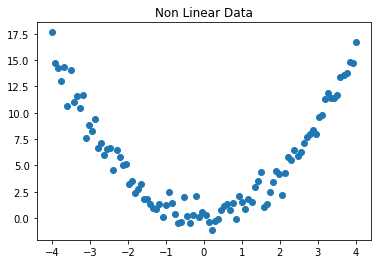

In [106]:
plt.scatter(x, y)
plt.title('Non Linear Data')
plt.show()

In [107]:
x_var = Variable(torch.FloatTensor(x))
y_var = Variable(torch.FloatTensor(y))

In [122]:
class NeuralNet(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [123]:
net = NeuralNet(1, 10, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.008)
loss_fn = torch.nn.MSELoss()
print(net)

NeuralNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [124]:
plt.ion()
for e in range(5000):
    y_pred = net.forward(x_var)
    loss = loss_fn(y_pred, y_var)
    if e % 100 == 0:
        print("loss after epoch: " + str(e) + " is: " + str(loss.data.numpy()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss after epoch: 0 is: 55.62013
loss after epoch: 100 is: 2.88511
loss after epoch: 200 is: 1.9989201
loss after epoch: 300 is: 1.7074225
loss after epoch: 400 is: 1.4995242
loss after epoch: 500 is: 1.3310478
loss after epoch: 600 is: 1.1891533
loss after epoch: 700 is: 1.0945678
loss after epoch: 800 is: 1.0228652
loss after epoch: 900 is: 0.9634205
loss after epoch: 1000 is: 0.91883695
loss after epoch: 1100 is: 0.8868092
loss after epoch: 1200 is: 0.8587624
loss after epoch: 1300 is: 0.84231895
loss after epoch: 1400 is: 0.8234387
loss after epoch: 1500 is: 0.79664874
loss after epoch: 1600 is: 0.790974
loss after epoch: 1700 is: 0.7880947
loss after epoch: 1800 is: 0.78622705
loss after epoch: 1900 is: 0.78346044
loss after epoch: 2000 is: 0.7826754
loss after epoch: 2100 is: 0.782104
loss after epoch: 2200 is: 0.781649
loss after epoch: 2300 is: 0.7812769
loss after epoch: 2400 is: 0.7809577
loss after epoch: 2500 is: 0.7806852
loss after epoch: 2600 is: 0.78044945
loss after ep

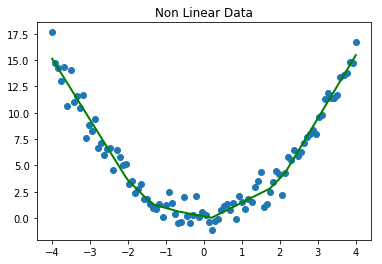

In [125]:
plt.scatter(x, y)
plt.plot(x, net.forward(x_var).data.numpy(), 'g-', lw=2)
plt.title('Non Linear Data')
plt.show()

In [126]:
# Observations
# Relu gives the output with kinks
# Sigmoid and Tanh gives smooth output